# Table of Contents
 <p><div class="lev1 toc-item"><a href="#DATA:" data-toc-modified-id="DATA:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>DATA:</a></div><div class="lev1 toc-item"><a href="#exploration" data-toc-modified-id="exploration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>exploration</a></div><div class="lev2 toc-item"><a href="#plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)" data-toc-modified-id="plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-civilian-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-civilian-fire-arms-per-person-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>plot the average number of civilian fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-homicide-by-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-homicide-by-fire-arms-per-person-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>plot the average number of homicide by fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-24"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-25"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev1 toc-item"><a href="#Modeling" data-toc-modified-id="Modeling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Modeling</a></div><div class="lev2 toc-item"><a href="#fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person." data-toc-modified-id="fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person.-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person.</a></div><div class="lev2 toc-item"><a href="#Outlier-removal:" data-toc-modified-id="Outlier-removal:-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Outlier removal:</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them" data-toc-modified-id="Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them-33"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Extra credit: calculate the confidence interval by hand and also plot them</a></div><div class="lev2 toc-item"><a href="#Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot." data-toc-modified-id="Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot.-34"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Use the stsatsmodels.gaphics package to plot the influence plot.</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences" data-toc-modified-id="Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences-35"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences</a></div><div class="lev2 toc-item"><a href="#Discuss-your-findings" data-toc-modified-id="Discuss-your-findings-36"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Discuss your findings</a></div>

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pylab as pl
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
import zipfile
from IPython.display import Image
% pylab inline

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


Populating the interactive namespace from numpy and matplotlib


**regression exercise**

**written by Federica B Bianco CUSP 2017**

**for PUI lecture on models and linear regression**

**investigate linear relationships between fire arm possession, homicides by fire arms, and mass shootings for different countries, considering also the country GDP**

# 1. DATA: 

The Guardian firearms murders and ownership data. The relevans sheet is uploaded in the github repository as a csv file. Download it from there. Note: this dataset is from 2012.

**Extra credit**: download directly from google docs with a google API

https://docs.google.com/spreadsheets/d/1chqUZHuY6cXYrRYkuE0uwXisGaYvr7durZHJhpLGycs/edit#gid=0

Number of mass shootings: find the link here https://datawrapper.dwcdn.net/pvLFI/4/

The world population by country find the download link here :
https://data.worldbank.org/indicator/SP.POP.TOTL

Remember that all read or downloads have to me reproducible.

Merge all datasets. After throwing away the irrelevant data it should look something like this (I renamed the GDP and the population as gdp" and "pop")

Throughout, when I ask you to include errors in plots or models, use Poisson statistics: the error is the square root of the number you are considering (e.g. this country has N fire arms +/- square root of N, or this country has Np [= N/population +/- (square root of N) / population] fire arms per person).

In [2]:
# The following dataset are all downloaded directly from the links provided above. 
# I have included all the raw files on the HW9_sz2404 repo. All the raw data are in the same folder can be read directly by names.
df1=pd.read_excel('World_firearms_murders_and_ownership.xlsx')
df2=pd.read_csv('data-pvLFI.csv')
pop=pd.read_excel('Population.xls')

### Population Data Cleaning

In [3]:
pop=pop.drop(pop.index[[0,1]])
pop.columns=pop.iloc[0]
pop=pop.drop(pop.index[0])
pop=pop.reset_index()
pop.head()

2,index,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,...,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0
0,3,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,4,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,5,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,6,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,7,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0


In [4]:
pop.columns

Index([         'index',   'Country Name',   'Country Code', 'Indicator Name',
       'Indicator Code',           1960.0,           1961.0,           1962.0,
                 1963.0,           1964.0,           1965.0,           1966.0,
                 1967.0,           1968.0,           1969.0,           1970.0,
                 1971.0,           1972.0,           1973.0,           1974.0,
                 1975.0,           1976.0,           1977.0,           1978.0,
                 1979.0,           1980.0,           1981.0,           1982.0,
                 1983.0,           1984.0,           1985.0,           1986.0,
                 1987.0,           1988.0,           1989.0,           1990.0,
                 1991.0,           1992.0,           1993.0,           1994.0,
                 1995.0,           1996.0,           1997.0,           1998.0,
                 1999.0,           2000.0,           2001.0,           2002.0,
                 2003.0,           2004.0,          

In [5]:
pop=pop.drop(['index','Country Code', 'Indicator Name',
       'Indicator Code',           1960.0,           1961.0,           1962.0,
                 1963.0,           1964.0,           1965.0,           1966.0,
                 1967.0,           1968.0,           1969.0,           1970.0,
                 1971.0,           1972.0,           1973.0,           1974.0,
                 1975.0,           1976.0,           1977.0,           1978.0,
                 1979.0,           1980.0,           1981.0,           1982.0,
                 1983.0,           1984.0,           1985.0,           1986.0,
                 1987.0,           1988.0,           1989.0,           1990.0,
                 1991.0,           1992.0,           1993.0,           1994.0,
                 1995.0,           1996.0,           1997.0,           1998.0,
                 1999.0,           2000.0,           2001.0,           2002.0,
                 2003.0,           2004.0,           2005.0,           2006.0,
                 2007.0,           2008.0,           2009.0,           2010.0,
                 2011.0,           2013.0,           2014.0,           2015.0,           2016.0,           2017.0], axis=1)
pop.head()

2,Country Name,2012.0
0,Aruba,102577.0
1,Afghanistan,30696958.0
2,Angola,25096150.0
3,Albania,2900401.0
4,Andorra,82431.0


### GDP Data cleaning

Data obtained from: https://data.worldbank.org/indicator/NY.GDP.PCAP.CD?view=chart

In [6]:
# GDP data was obtained from World bank as well (address stated above)
# The raw data has been uploaded to HW9_sz2404 Github repo for reproducibility. 
gdp=pd.read_excel('GDP.xls')
gdp.head()

,Data Source,World Development Indicators,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61
0,Last Updated Date,2018-10-18 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Country Name,Country Code,Indicator Name,Indicator Code,1.960000e+03,1.961000e+03,1.962000e+03,1.963000e+03,1.964000e+03,1.965000e+03,...,2.008000e+03,2.009000e+03,2.010000e+03,2.011000e+03,2.012000e+03,2.013000e+03,2.014000e+03,2.015000e+03,2.016000e+03,2.017000e+03
3,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.791961e+09,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.019053e+10,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.026425e+10,2.061610e+10,1.921556e+10,1.946902e+10,2.081530e+10


In [7]:
gdp=gdp.drop(gdp.index[[0,1]])
gdp.columns=gdp.iloc[0]
gdp=gdp.drop(gdp.index[0])
gdp=gdp.reset_index()
gdp.head()

2,index,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,...,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0
0,3,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,...,2.791961e+09,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN,NaN,NaN
1,4,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,...,1.019053e+10,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.026425e+10,2.061610e+10,1.921556e+10,1.946902e+10,2.081530e+10
2,5,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,...,8.417804e+10,7.549239e+10,8.252614e+10,1.041158e+11,1.139232e+11,1.249125e+11,1.267302e+11,1.026212e+11,9.533720e+10,1.242094e+11
3,6,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,...,1.288135e+10,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.138693e+10,1.188368e+10,1.303935e+10
4,7,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,...,4.007353e+09,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.877312e+09,3.012914e+09


In [8]:
gdp.columns

Index([         'index',   'Country Name',   'Country Code', 'Indicator Name',
       'Indicator Code',           1960.0,           1961.0,           1962.0,
                 1963.0,           1964.0,           1965.0,           1966.0,
                 1967.0,           1968.0,           1969.0,           1970.0,
                 1971.0,           1972.0,           1973.0,           1974.0,
                 1975.0,           1976.0,           1977.0,           1978.0,
                 1979.0,           1980.0,           1981.0,           1982.0,
                 1983.0,           1984.0,           1985.0,           1986.0,
                 1987.0,           1988.0,           1989.0,           1990.0,
                 1991.0,           1992.0,           1993.0,           1994.0,
                 1995.0,           1996.0,           1997.0,           1998.0,
                 1999.0,           2000.0,           2001.0,           2002.0,
                 2003.0,           2004.0,          

In [9]:
gdp=gdp.drop([         'index',   'Country Code', 'Indicator Name',
       'Indicator Code',           1960.0,           1961.0,           1962.0,
                 1963.0,           1964.0,           1965.0,           1966.0,
                 1967.0,           1968.0,           1969.0,           1970.0,
                 1971.0,           1972.0,           1973.0,           1974.0,
                 1975.0,           1976.0,           1977.0,           1978.0,
                 1979.0,           1980.0,           1981.0,           1982.0,
                 1983.0,           1984.0,           1985.0,           1986.0,
                 1987.0,           1988.0,           1989.0,           1990.0,
                 1991.0,           1992.0,           1993.0,           1994.0,
                 1995.0,           1996.0,           1997.0,           1998.0,
                 1999.0,           2000.0,           2001.0,           2002.0,
                 2003.0,           2004.0,           2005.0,           2006.0,
                 2007.0,           2008.0,           2009.0,           2010.0,
                 2011.0,           2013.0,           2014.0,
                 2015.0,           2016.0,           2017.0], axis=1)

In [10]:
gdp.head()

2,Country Name,2012.0
0,Aruba,NaN
1,Afghanistan,2.053654e+10
2,Angola,1.139232e+11
3,Albania,1.231978e+10
4,Andorra,3.164615e+09


## Merging

In [11]:
df3=pd.merge(pop,gdp,on='Country Name')
df4=pd.merge(df1,df2, right_on="Country", left_on="Country/Territory")
df_=pd.merge(df3,df4,right_on='Country', left_on='Country Name')
df_.head()

2,Country Name,2012.0_x,2012.0_y,Country/Territory,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms,Country,Guns per 100 inhabitants,Number of mass shootings (1983-2013)
0,Australia,22742475.0,1.543411e+12,Australia,AU,NSO,11.5,30.0,0.14,42.0,15.0,3050000.0,Australia,15.0,4
1,Austria,8429991.0,4.094252e+11,Austria,AT,CTS,29.5,18.0,0.22,14.0,30.4,2500000.0,Austria,30.4,1
2,Belgium,11128246.0,4.978842e+11,Belgium,BE,WHO-MDB,39.5,70.0,0.68,34.0,17.2,1800000.0,Belgium,17.2,2
3,Canada,34750545.0,1.824289e+12,Canada,CA,CTS,32.0,173.0,0.51,13.0,30.8,9950000.0,Canada,30.8,4
4,Switzerland,7996861.0,6.680436e+11,Switzerland,CH,CTS,72.2,57.0,0.77,3.0,45.7,3400000.0,Switzerland,45.7,2


In [12]:
df_.columns

Index(['Country Name', '2012.0_x', '2012.0_y', 'Country/Territory', 'ISO code',
       'Source', '% of homicides by firearm', 'Number of homicides by firearm',
       'Homicide by firearm rate per 100,000 pop', 'Rank by rate of ownership',
       'Average firearms per 100 people',
       'Average total all civilian firearms', 'Country',
       'Guns per 100 inhabitants', 'Number of mass shootings (1983-2013)'],
      dtype='object', name=2)

In [13]:
df_=df_.drop(['Country/Territory', 'ISO code',
       'Source', '% of homicides by firearm',
       'Homicide by firearm rate per 100,000 pop', 'Rank by rate of ownership',
       'Average firearms per 100 people'], axis=1)

In [14]:
df_=df_.rename(columns={'2012.0_x': 'Pop', '2012.0_y': 'GDP', 'Guns per 100 inhabitants':'Guns/100 inhabitants','Number of mass shootings (1983-2013)':'Number of mass shootings'})

In [15]:
df_.head()

2,Country Name,Pop,GDP,Number of homicides by firearm,Average total all civilian firearms,Country,Guns/100 inhabitants,Number of mass shootings
0,Australia,22742475.0,1.543411e+12,30.0,3050000.0,Australia,15.0,4
1,Austria,8429991.0,4.094252e+11,18.0,2500000.0,Austria,30.4,1
2,Belgium,11128246.0,4.978842e+11,70.0,1800000.0,Belgium,17.2,2
3,Canada,34750545.0,1.824289e+12,173.0,9950000.0,Canada,30.8,4
4,Switzerland,7996861.0,6.680436e+11,57.0,3400000.0,Switzerland,45.7,2


### It can be seen that the GDP has slight differences between the data I collected and Dr. Bianco's number. The dataset I used is updated 2018 Oct reflecting the current US dollar value. The notebook stated CUSP 2017 at the beginning at therefore, the data below (generated by Dr. Bianco might have used the data from a previous year and therefore, reflecting a different currency value.)

# 2. Exploration

## 1. Plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)

Use Poisson statistics for the errorbars on the number of mass shootings (optional: include errors on the population, also as Poisson statistics)

Are there any points that look like they may be outilers?


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


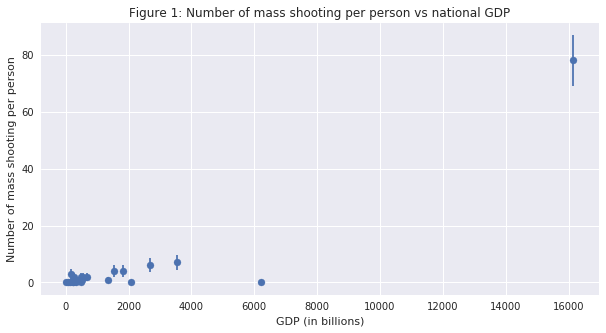

Caption: Number of mass shooting vs GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has noth the highest GDP and the highest number of mass shootings


In [16]:
# Mass shooting vs GDP (Absolute numbers)
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_.GDP / 1e9, df_['Number of mass shootings'])
ax.errorbar(df_.GDP / 1e9, df_['Number of mass shootings'], 
            yerr = np.sqrt(df_['Number of mass shootings'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Number of mass shooting per person")
ax.set_title('Figure 1: Number of mass shooting per person vs national GDP')
ax.set_ylim()
pl.show()
print ("Caption: Number of mass shooting vs GDP, " +       "errors represent Poisson statistics.\n" +
       "The datapoint to the top right of the plot is the USA, " + 
       "which has noth the highest GDP and the highest number of mass shootings")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


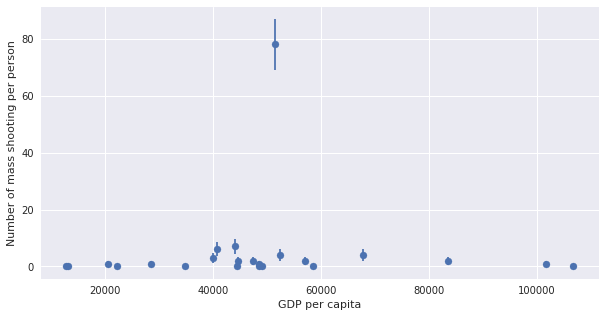

Caption: Number of mass shooting vs GDP per Capita, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has noth the highest GDP and the highest number of mass shootings


In [17]:
# Mass shooting vs GDP
df_['GDPpc'] = df_["GDP"] / df_['Pop']
fig = pl.figure(figsize=(10,5)) 
ax_mg = fig.add_subplot(111)

scatter_mg = ax_mg.scatter(df_['GDPpc'], df_['Number of mass shootings'])
ax_mg.errorbar(df_['GDPpc'], df_['Number of mass shootings'], 
            yerr = np.sqrt(df_['Number of mass shootings'] * 1.0), fmt = '.')
ax_mg.set_xlabel("GDP per capita")
ax_mg.set_ylabel("Number of mass shooting per person")
ax.set_title('Figure 2: Number of mass shooting per person vs national GDP per capita')
ax_mg.set_ylim()
pl.show()
print ("Caption: Number of mass shooting vs GDP per Capita, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has noth the highest GDP and the highest number of mass shootings")

## 2. plot the average number of civilian fire arms per person
first without errors, then with errors. are there  points that look like outliers?

In [18]:
df_['shootingspp'] = df_["Number of mass shootings"] / df_['Pop'] * 1e3

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


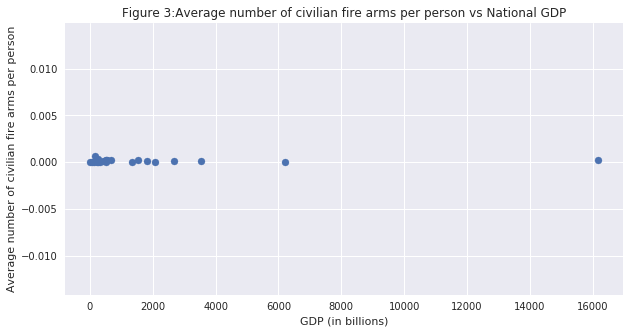

Caption: Average number of civilian fire arms per person vs GDP, The datapoint to the top right of the plot is the USA, which has noth the highest GDP and the highest number of mass shootings


In [19]:
# Without Errors
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter_Cpc = ax.scatter(df_.GDP / 1e9, df_['shootingspp'])
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Average number of civilian fire arms per person")
ax.set_title('Figure 3:Average number of civilian fire arms per person vs National GDP')
ax.set_ylim()
pl.show()
print ("Caption: Average number of civilian fire arms per person vs GDP, " + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has noth the highest GDP and the highest number of mass shootings")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


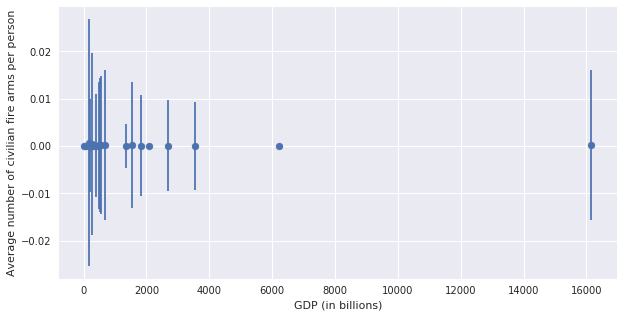

Caption: Average number of civilian fire arms per person vs GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has noth the highest GDP and the highest number of mass shootings


In [20]:
#With Errors
fig = pl.figure(figsize=(10,5)) 
ax2 = fig.add_subplot(111)

scatter2 = ax2.scatter(df_.GDP / 1e9, df_['shootingspp'])
ax2.errorbar(df_.GDP / 1e9, df_['shootingspp'], 
            yerr = np.sqrt(df_['shootingspp'] * 1.0), fmt = '.')
ax2.set_xlabel("GDP (in billions)")
ax2.set_ylabel("Average number of civilian fire arms per person")
ax.set_title('Figure 4: Average number of civilian fire arms with Errors per person vs National GDP')
ax2.set_ylim()
pl.show()
print ("Caption: Average number of civilian fire arms per person vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has noth the highest GDP and the highest number of mass shootings")

## 3. plot the average number of homicide by fire arms per person
first as a histogram

then against the country GDP, with statistical errors. are there  points that look like outliers?

Text(0.5,1,'Figure 5: Countries Count: Homicides by firearm per 1000 people')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


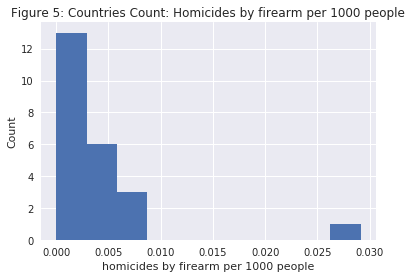

In [21]:
# Histogram
fig, ax = plt.subplots()
pl.figure(figsize(10,12))
df_['Homi_pc'] = df_['Number of homicides by firearm'] / df_['Pop'] *1000
ax.hist(df_['Homi_pc'])
ax.set_xlabel('homicides by firearm per 1000 people')
ax.set_ylabel('Count')
ax.set_title('Figure 5: Countries Count: Homicides by firearm per 1000 people')


### Caption: 
Most countries are having close to 0 or less than 0.001 homicides per 1000 people but one country has between 0.025 to 0.03 homicides by firmarm per 100 people.

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


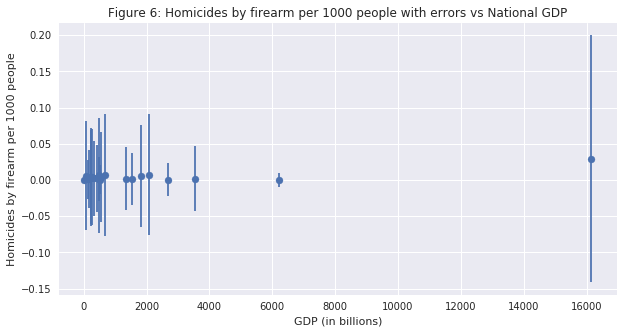

Caption: Homicides by firearm per 1000 people vs GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has noth the highest GDP and the highest number of mass shootings


In [22]:
# then against the country GDP, with statistical errors. are there points that look like outliers?

fig = pl.figure(figsize=(10,5)) 
ax_hpc = fig.add_subplot(111)

scatter_hpc = ax_hpc.scatter(df_.GDP / 1e9, df_['Homi_pc'])
ax_hpc.errorbar(df_.GDP / 1e9, df_['Homi_pc'], 
            yerr = np.sqrt(df_['Homi_pc'] * 1.0), fmt = '.')
ax_hpc.set_xlabel("GDP (in billions)")
ax_hpc.set_ylabel("Homicides by firearm per 1000 people")
ax_hpc.set_title('Figure 6: Homicides by firearm per 1000 people with errors vs National GDP')
ax_hpc.set_ylim()
pl.show()
print ("Caption: Homicides by firearm per 1000 people vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has noth the highest GDP and the highest number of mass shootings")

## 4. plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color
with and without errorbars


In [23]:
# Finding US
df_['Number of homicides by firearm'][(df_['Country']=='United States')]

22    9146.0
Name: Number of homicides by firearm, dtype: float64

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


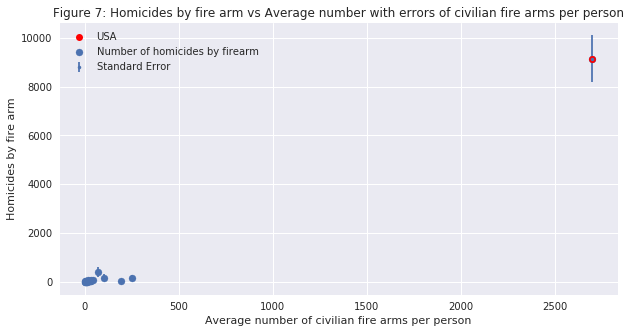

In [24]:
# Without Erros
fig = pl.figure(figsize=(10,5)) 
ax_hc = fig.add_subplot(111)

scatter_hc = ax_hc.scatter(df_['Average total all civilian firearms']/1e5, df_['Number of homicides by firearm'])
ax_hc.errorbar(df_['Average total all civilian firearms']/1e5, df_['Number of homicides by firearm'],
            yerr = np.sqrt(df_['Number of homicides by firearm'] * 100), fmt = '.',label='Standard Error')

scatter_us = ax_hc.plot(df_['Average total all civilian firearms'][22]/1e5,df_['Number of homicides by firearm'][22],'ro', label='USA')
ax_hc.set_xlabel("Average number of civilian fire arms per person")
ax_hc.set_ylabel("Homicides by fire arm")
ax_hc.set_title('Figure 7: Homicides by fire arm vs Average number with errors of civilian fire arms per person')
ax_hc.set_ylim()
pl.legend()
pl.show()

### Caption:
USA demosntrate hide average number of civilian fireams per person as well as homicided by fire arm. USA's statistic is way higher than other countries.

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


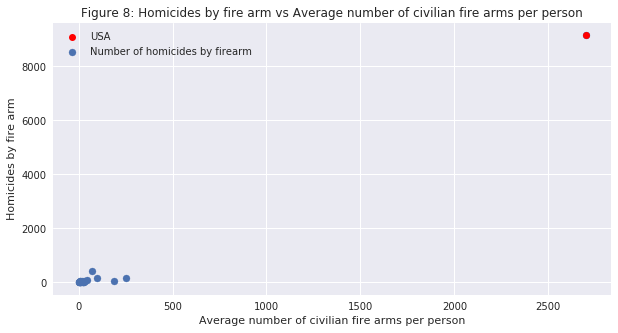

In [25]:
# Without Errors
fig = pl.figure(figsize=(10,5)) 
ax_hc = fig.add_subplot(111)

scatter_hc = ax_hc.scatter(df_['Average total all civilian firearms']/1e5, df_['Number of homicides by firearm'])
scatter_us = ax_hc.plot(df_['Average total all civilian firearms'][22]/1e5,df_['Number of homicides by firearm'][22],'ro', label='USA')

ax_hc.set_xlabel("Average number of civilian fire arms per person")
ax_hc.set_ylabel("Homicides by fire arm")
ax_hc.set_title('Figure 8: Homicides by fire arm vs Average number of civilian fire arms per person')
ax_hc.set_ylim()
pl.legend()
pl.show()

### Caption:
USA demosntrate hide average number of civilian fireams per person as well as homicided by fire arm. USA's statistic is way higher than other countries.

## 5. plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color
with and without errorbars


In [26]:
# Finding the value of U.S
df_['Average total all civilian firearms'][(df_['Country']=='United States')]

22    270000000.0
Name: Average total all civilian firearms, dtype: float64

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


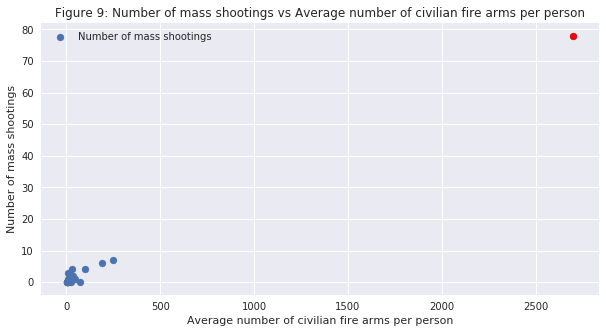

Caption: Number of mass shootings vs Average total all civilian firearms.The red dot represents USA, which has noth the highest Average civilian firearm per capita and the highest number of mass shooting


In [27]:
# Without Errors
fig = pl.figure(figsize=(10,5)) 

ax_hc = fig.add_subplot(111)

x = df_['Average total all civilian firearms'][22]
y =df_['Number of mass shootings'][22]

scatter_us = ax_hc.plot(x/1e5,y,'ro')
scatter_hc = ax_hc.scatter(df_['Average total all civilian firearms']/1e5, df_['Number of mass shootings'])

ax_hc.set_xlabel("Average number of civilian fire arms per person")
ax_hc.set_ylabel("Number of mass shootings")
ax_hc.set_ylim()
ax_hc.set_title('Figure 9: Number of mass shootings vs Average number of civilian fire arms per person')
pl.legend()
pl.show()
print('Caption: Number of mass shootings vs Average total all civilian firearms.'+
'The red dot represents USA, which has noth the highest Average civilian firearm per capita and the highest number of mass shooting')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


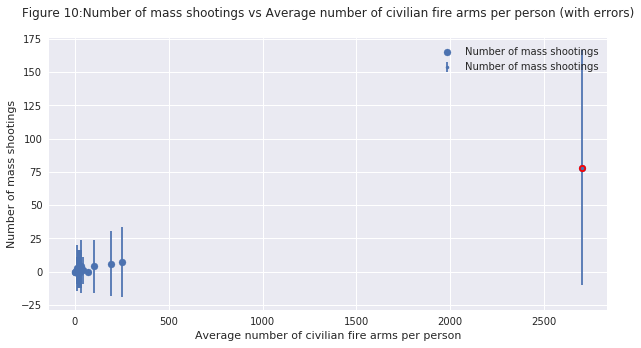

Caption: Number of mass shootings vs Average total all civilian firearms, errors represent Poisson statistics.
The red dot represents USA, which has noth the highest Average civilian firearm per capita and the highest number of mass shooting


In [28]:
# With Errors
ax_hc=pl.figure(figsize=(10,5)).add_subplot(111)

x = df_['Average total all civilian firearms'][22]
y =df_['Number of mass shootings'][22]

scatter_us = ax_hc.plot(x/1e5,y,'ro')
scatter_hc = ax_hc.scatter(df_['Average total all civilian firearms']/1e5, df_['Number of mass shootings'])
ax_hc.errorbar(df_['Average total all civilian firearms']/1e5, df_['Number of mass shootings'],
            yerr = np.sqrt(df_['Number of mass shootings'] * 100), fmt = '.')

ax_hc.set_xlabel("Average number of civilian fire arms per person")
ax_hc.set_ylabel("Number of mass shootings")
ax_hc.set_title('Figure 10:Number of mass shootings vs Average number of civilian fire arms per person (with errors)\n')
ax_hc.set_ylim()


pl.legend()
pl.show()

print ("Caption: Number of mass shootings vs Average total all civilian firearms, " + 
       "errors represent Poisson statistics.\n" + 
       "The red dot represents USA, " + 
       "which has noth the highest Average civilian firearm per capita and the highest number of mass shooting")



# 3. Modeling

## 1. fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person. 
Before you do it it is a good idea to make sure that both quantities are roughly of the same order of magnitude (unity). (You can simply divide by the order of magnitude of the mean of the sample to obtain this). Use

    - statsmodels OLS
    - statsmodels WLS
    - seaborn
    - choose one of
        -- creating a function that calculates the residuals and minimizing that function
        -- analytical solution http://mathworld.wolfram.com/LeastSquaresFitting.html
        -- numpy.polyfit() - https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polyfit.html
    

WLS: that is the weighted square fit. The statsmodel package WLS function allows you to take the uncertainties of each data point into account when you fit your model. It takes the parameter weights, which is the inverse of your errors:
weights = 1.0/df.yerror
Notice that 
    a - sqrt(0) = 0
    b - 1/0 = infinity
    c - you cannot have weight that are infinity in your fit. Please come up with a solution and justify it.


the latter three you can learn about in this example: https://github.com/fedhere/PUI2017_fb55/blob/master/Lab5_fb55/genderIncomeBias.ipynb
Since we did not discuss these, I will add some notes to the repo in the afternoon.

Use the seaborn python package built in regression function  to plot the regression confidence intervals. 

import seaborn  as sns
sns.regplot(x="x", y="y", data=df);




### OLS Model

In [29]:
df_['Mass_pc_1'] = df_['Number of mass shootings']/df_['Pop']
df_['Fire_pc'] = df_['Average total all civilian firearms']/df_['Pop']

In [30]:
df_['Mass_pc_1']

0     1.758824e-07
1     1.186241e-07
2     1.797228e-07
3     1.151061e-07
4     2.500981e-07
5     8.703672e-08
6     0.000000e+00
7     2.137983e-08
8     3.694146e-07
9     9.138013e-08
10    0.000000e+00
11    0.000000e+00
12    0.000000e+00
13    0.000000e+00
14    0.000000e+00
15    0.000000e+00
16    0.000000e+00
17    1.992598e-07
18    6.805653e-07
19    0.000000e+00
20    9.510365e-08
21    2.100978e-07
22    2.484130e-07
Name: Mass_pc_1, dtype: float64

In [31]:
df_['Fire_pc']

0     0.134110
1     0.296560
2     0.161751
3     0.286326
4     0.425167
5     0.310845
6     0.116246
7     0.096209
8     0.443298
9     0.289370
10    0.226347
11    0.056450
12    0.078269
13    0.280622
14    0.117569
15    0.005563
16    0.131840
17    0.278964
18    0.209841
19    0.013399
20    0.085593
21    0.294137
22    0.859891
Name: Fire_pc, dtype: float64

In [32]:
# Changing magnitutde of Mass Shooting
df_['Mass_pc'] = df_['Mass_pc_1'] * 1e7

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


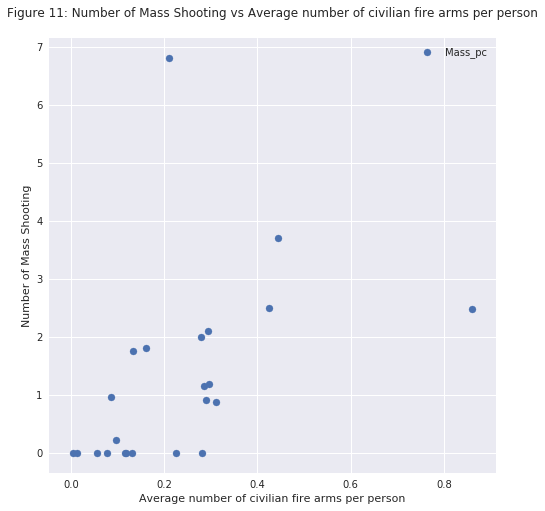

In [33]:
ax_mod=pl.figure(figsize=(8,8)).add_subplot(111)

scatter_mod = ax_mod.scatter(df_['Fire_pc'], df_['Mass_pc'])

ax_mod.set_xlabel("Average number of civilian fire arms per person")
ax_mod.set_ylabel("Number of Mass Shooting")
ax_mod.set_title('Figure 11: Number of Mass Shooting vs Average number of civilian fire arms per person\n')
ax_mod.set_ylim()
pl.legend()
pl.show()

### Caption:
The plot shows the mass shooting count versus the average of civilian fire arm per capita. There are a few dots with zero counts on civilian fire arms that can represent countries with strong control towards fire arm or missing data. 

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


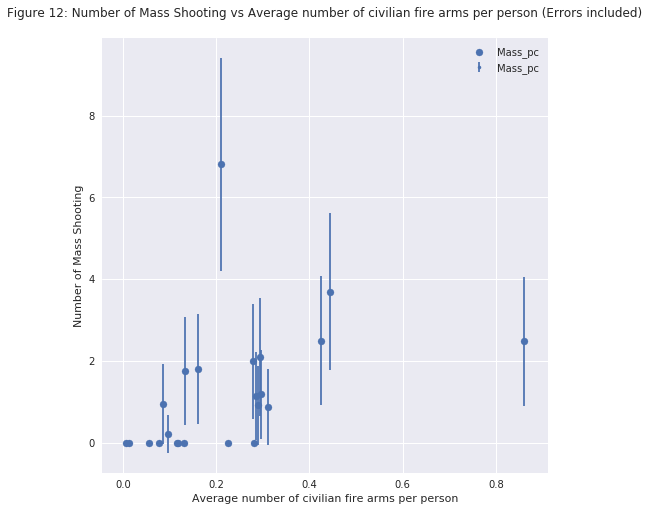

In [34]:
# With Errors
ax_mod=pl.figure(figsize=(8,8)).add_subplot(111)

scatter_mod = ax_mod.scatter(df_['Fire_pc'], df_['Mass_pc'])
ax_mod.errorbar(df_['Fire_pc'], df_['Mass_pc'],
            yerr = np.sqrt(df_['Mass_pc']), fmt = '.')

ax_mod.set_xlabel("Average number of civilian fire arms per person")
ax_mod.set_ylabel("Number of Mass Shooting")
ax_mod.set_title('Figure 12: Number of Mass Shooting vs Average number of civilian fire arms per person (Errors included)\n')
ax_mod.set_ylim()
pl.legend()
pl.show()


### Caption: 
The plot shows the mass shooting count versus the average of civilian fire arm per capita with error bars plotted. 

In [35]:
# Fitting an OLS Model
Fit1=smf.ols(formula='Mass_pc ~ 1 + Fire_pc', data=df_).fit()
Fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Mass_pc   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     4.981
Date:                Tue, 13 Nov 2018   Prob (F-statistic):             0.0367
Time:                        00:01:06   Log-Likelihood:                -40.676
No. Observations:                  23   AIC:                             85.35
Df Residuals:                      21   BIC:                             87.62
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.3684      0.497      0.742      0.467        -0.665     1.402
Fire_pc        3.8373      1.719      2.232      0.037         0.262     7.413
==============================================================================
Omnibus:                       34.558   Durbin-Watson:                   1.860
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.760
Skew:                           2.666   Prob(JB):                     5.32e-20
Kurtosis:                      11.012   Cond. No.                         5.85
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


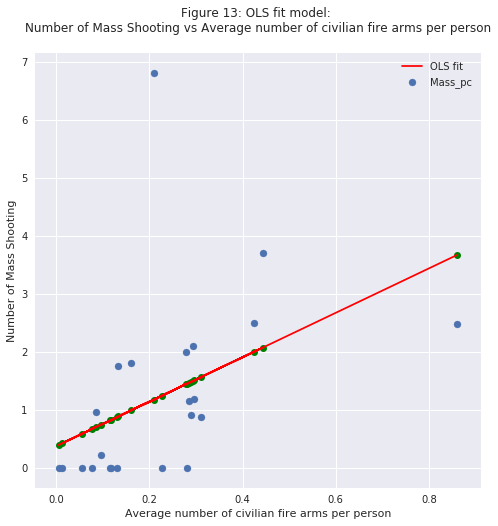

In [36]:
ax_mod=pl.figure(figsize(8,8)).add_subplot(111)
x=df_['Fire_pc']
ax_mod.scatter(x, df_['Mass_pc'])
ax_mod.plot(x,Fit1.predict(df_),'go')
ax_mod.plot(x,Fit1.predict(df_),'red', label='OLS fit')
ax_mod.set_xlabel("Average number of civilian fire arms per person")
ax_mod.set_ylabel("Number of Mass Shooting")
ax_mod.set_title('Figure 13: OLS fit model: \nNumber of Mass Shooting vs Average number of civilian fire arms per person\n')
ax_mod.set_ylim()
pl.legend()
pl.show()


### Caption: 
A fitted line by the OLS model is demonstrated. 

### WLS Model

In [37]:
# Getting the errors first
df_['Yerr']=np.sqrt(df_['Mass_pc']*100)
df_['Yerr']

0     13.262064
1     10.891469
2     13.406075
3     10.728751
4     15.814491
5      9.329347
6      0.000000
7      4.623833
8     19.220162
9      9.559295
10     0.000000
11     0.000000
12     0.000000
13     0.000000
14     0.000000
15     0.000000
16     0.000000
17    14.115942
18    26.087647
19     0.000000
20     9.752110
21    14.494752
22    15.761122
Name: Yerr, dtype: float64

In [38]:
# There are a few 0s so reassigning values to those. 
df_['Yerr'].describe()

count    23.000000
mean      8.132481
std       7.748688
min       0.000000
25%       0.000000
50%       9.559295
75%      13.761009
max      26.087647
Name: Yerr, dtype: float64

In [39]:
# Assigning a new values because I do not want to affect the mean and the standard deviation too much. 
df_.loc[[6],'Yerr']=1
df_.loc[[10],'Yerr']=1
df_.loc[[11],'Yerr']=1
df_.loc[[12],'Yerr']=1
df_.loc[[13],'Yerr']=1
df_.loc[[14],'Yerr']=1
df_.loc[[15],'Yerr']=1
df_.loc[[16],'Yerr']=1
df_.loc[[19],'Yerr']=1
df_['Yerr']

0     13.262064
1     10.891469
2     13.406075
3     10.728751
4     15.814491
5      9.329347
6      1.000000
7      4.623833
8     19.220162
9      9.559295
10     1.000000
11     1.000000
12     1.000000
13     1.000000
14     1.000000
15     1.000000
16     1.000000
17    14.115942
18    26.087647
19     1.000000
20     9.752110
21    14.494752
22    15.761122
Name: Yerr, dtype: float64

In [40]:
df_['Yerr'].describe()
# The overall stats has not changed much so I will proceed to WLS. 

count    23.000000
mean      8.523785
std       7.323751
min       1.000000
25%       1.000000
50%       9.559295
75%      13.761009
max      26.087647
Name: Yerr, dtype: float64

In [41]:
# Fitting an WLS Model
# Reference: https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.WLS.html
Fit2=smf.wls(formula='Mass_pc ~ 1 + Fire_pc', data=df_, weights=1/df_['Yerr']).fit()
Fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                Mass_pc   R-squared:                       0.210
Model:                            WLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     5.591
Date:                Tue, 13 Nov 2018   Prob (F-statistic):             0.0278
Time:                        00:01:15   Log-Likelihood:                -28.845
No. Observations:                  23   AIC:                             61.69
Df Residuals:                      21   BIC:                             63.96
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.1747      0.199     -0.879      0.389        -0.588     0.239
Fire_pc        2.7120      1.147      2.365      0.028         0.327     5.097
==============================================================================
Omnibus:                        7.411   Durbin-Watson:                   1.306
Prob(Omnibus):                  0.025   Jarque-Bera (JB):                5.929
Skew:                           0.714   Prob(JB):                       0.0516
Kurtosis:                       5.037   Cond. No.                         9.06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


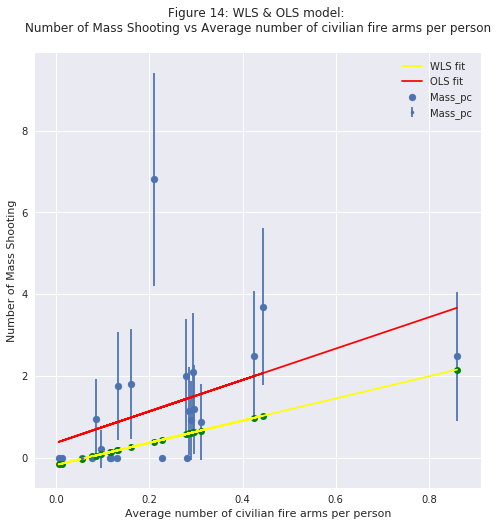

In [42]:
ax_wls=pl.figure(figsize(8,8)).add_subplot(111)
x=df_['Fire_pc']
ax_wls.scatter(x, df_['Mass_pc'])
ax_wls.plot(x,Fit2.predict(df_),'go')
ax_wls.errorbar(x, df_['Mass_pc'],
            yerr = np.sqrt(df_['Mass_pc']), fmt = '.')
ax_wls.plot(x,Fit2.predict(df_),'yellow', label='WLS fit')
ax_wls.plot(x,Fit1.predict(df_),'red', label='OLS fit')
ax_wls.set_xlabel("Average number of civilian fire arms per person")
ax_wls.set_ylabel("Number of Mass Shooting")
ax_wls.set_title('Figure 14: WLS & OLS model: \nNumber of Mass Shooting vs Average number of civilian fire arms per person\n')
ax_wls.set_ylim()
pl.legend()
pl.show()

### Caption:
This plot shows both models: WLS and OLS. WLS shows a smaller slope and intercept comparing to the OLS fitted line. 

## 2. Outlier removal:
The concept of outlier is actually rather sophisticated: a point can be an outlier in a context but not in another. If you want to remove outliers and try different fits, here is some info on how to remove data efficiently from a dataset 
    https://gist.github.com/fedhere/89db40a3c9a28335bf5a35d52a52c595

In [43]:
# Based on the above graph, the dot sits beyond y=4 can be a potential outlier as well as the one sit beyond x=0.8
# Dropping based on the above criteria.
# Reference: https://stackoverflow.com/questions/43136137/drop-a-specific-row-in-pandas
i=df_[((df_.Mass_pc> 6)|( df_.Fire_pc > 0.8))].index
df_1=df_.drop(i)


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


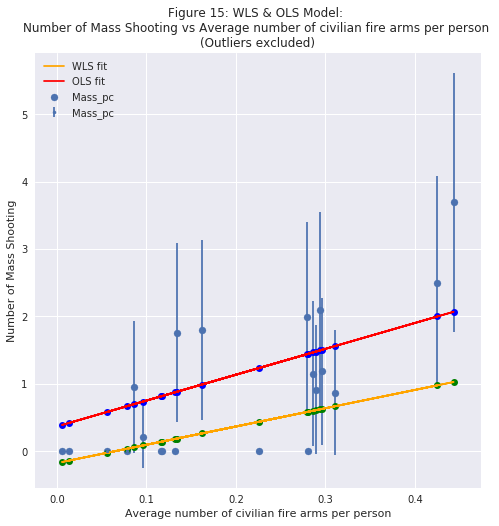

Caption: After excluding the outliers, we can see that all the dots are now closer to the two predicted lines.The slope of both lines are getting smaller.


In [44]:
# PLotting OLS and WLS
ax_new=pl.figure(figsize(8,8)).add_subplot(111)
x=df_1['Fire_pc']
ax_new.scatter(x, df_1['Mass_pc'])
ax_new.plot(x,Fit2.predict(df_1),'go')
ax_new.plot(x,Fit1.predict(df_1),'bo')
ax_new.errorbar(x, df_1['Mass_pc'],
            yerr = np.sqrt(df_1['Mass_pc']), fmt = '.')
ax_new.plot(x,Fit2.predict(df_1),'orange', label='WLS fit')
ax_new.plot(x,Fit1.predict(df_1),'red', label='OLS fit')
ax_new.set_xlabel("Average number of civilian fire arms per person")
ax_new.set_ylabel("Number of Mass Shooting")
ax_new.set_title('Figure 15: WLS & OLS Model: \nNumber of Mass Shooting vs Average number of civilian fire arms per person \n(Outliers excluded)')
ax_new.set_ylim()
pl.legend(loc='upper left')
pl.show()
print('Caption: After excluding the outliers, we can see that all the dots are now closer to the two predicted lines.' + 'The slope of both lines are getting smaller.')

In [45]:
# Getting information from the two models after excluding outliers. 
Fit2_o=smf.wls(formula='Mass_pc ~ 1 + Fire_pc', data=df_1, weights=1/df_1['Yerr']).fit()

Fit1_o=smf.ols(formula='Mass_pc ~ 1 + Fire_pc', data=df_1).fit()
print(Fit2.summary(), Fit1.summary())

                            WLS Regression Results                            
Dep. Variable:                Mass_pc   R-squared:                       0.210
Model:                            WLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     5.591
Date:                Tue, 13 Nov 2018   Prob (F-statistic):             0.0278
Time:                        00:01:22   Log-Likelihood:                -28.845
No. Observations:                  23   AIC:                             61.69
Df Residuals:                      21   BIC:                             63.96
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.1747      0.199     -0.879      0.3

### Interpretations: There are changes to the models after outliers are being excluded but changes are relatively small. 

## Extra credit: calculate the confidence interval by hand and also plot them 
you can use pylab.fill_between(x, yfit - ci, yfit + ci, alpha=0.5)

**Confidence intervals: **
there are three type of intervals in a linear regression, plot any one of them all three if you want - how do they compare to the seaborn plot?:

1) Confidence intervals for the parameters slope and intercept

2) Confidence interval for the average y value

3) Prediction interval for a single y value

1) __confidence interval of the  model parameters slope and intercept:__
define sigma as the sum of the residuals over the square root of number n of observations. 

sigma: σ̂ =sqrt(Sum((Yoberved_i−Ypredicted_i)^2)/n)

where the sum is over all observations

Define t_alpha/2,n-2 the t statistics at (1-alpha/2) for a t distribution with n-2 degrees of freedom (you can calculate it with scipy
tp = sp.stats.t.ppf(0.975, n-2)



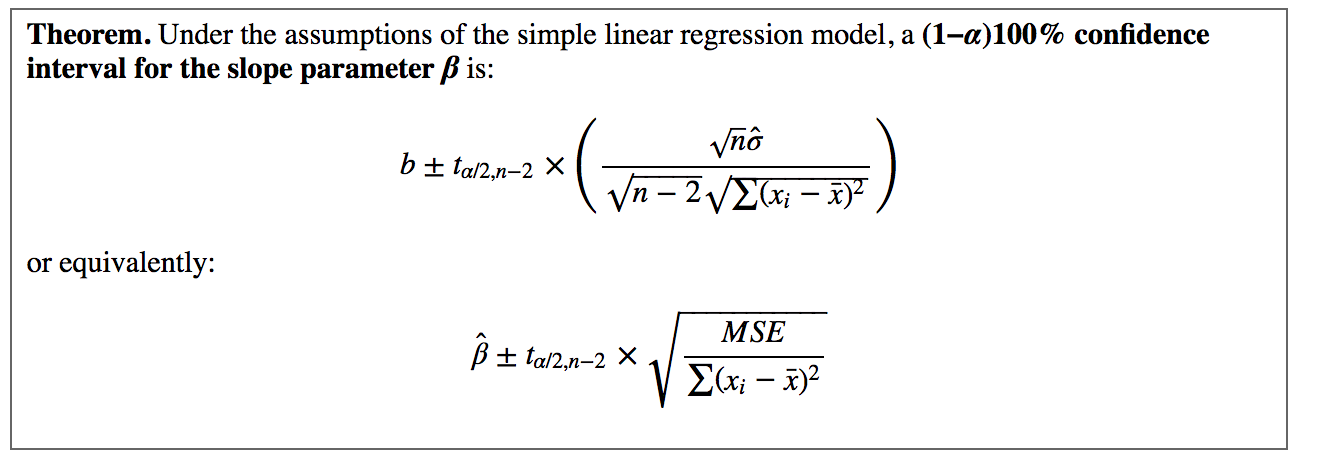

In [29]:
from IPython.display import Image
Image(filename="../Lab5_fb55/confidence_intervals_regression.png")

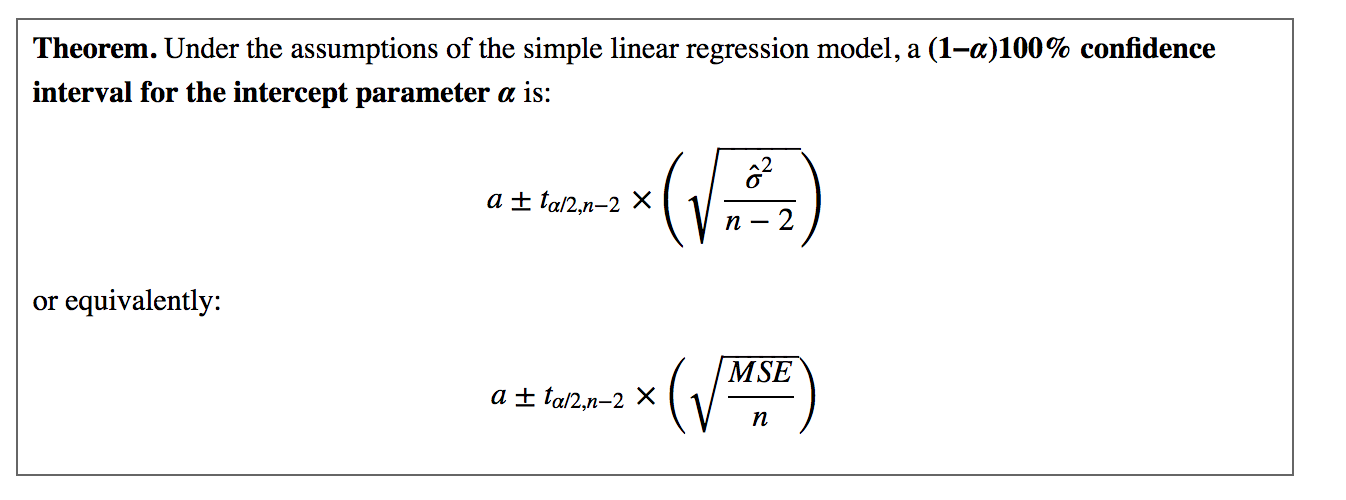

In [30]:
from IPython.display import Image
Image(filename="../Lab5_fb55/confidence_intervals_regression2.png")

[proof](https://onlinecourses.science.psu.edu/stat414/node/280)

2) **A confidence interval for E(y | x) , the expected (average) value of y for a given x_**

define s: residual standard error sy = sqrt(Sum((y_observed-y_predicted)^2)/(n-2))

(note: n-2 is the degrees of freedom of the problem: observations - number of parameters - 1)

the confidence interval for a given y(x*) is: 

y_predicted(x*) +/- t_(alpha/2)(n-2) * sy * sqrt( 1/n + (x* - mean(x)^2) / sum((x* - mean(x)^2)

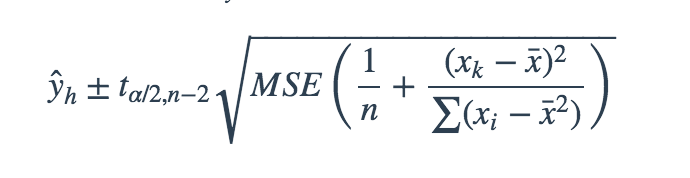

In [33]:
from IPython.display import Image
Image(filename="../Lab5_fb55/ciY.png")

3) **Confidence intervals for average y (predicted) values**

y_predicted(x*) +/- t_(n-2) * sy * sqrt( 1 + 1/n + (x* - mean(x)^2) / sum((x* - mean(x)^2)

very similar, but note the +1 in the square root

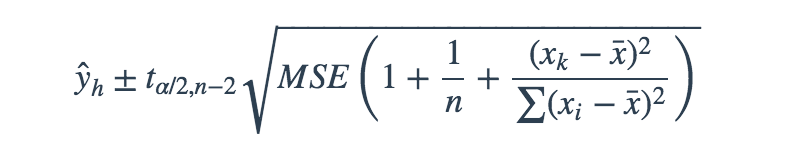

In [32]:
from IPython.display import Image
Image(filename="../Lab5_fb55/ciYaverage.png")

sigma: σ̂ =sqrt(Sum((Yoberved_i−Ypredicted_i)^2)/n)

where the sum is over all observations

Define t_alpha/2,n-2 the t statistics at (1-alpha/2) for a t distribution with n-2 degrees of freedom (you can calculate it with scipy tp = sp.stats.t.ppf(0.975, n-2)

In [46]:
tp = sp.stats.t.ppf(0.975, 21)

In [47]:
y_o=df_['Mass_pc']
x_o=df_['Fire_pc']
df_['Mass_ci'] = tp * sqrt( 1 + 1/23 + ((df_['Fire_pc'] - df_['Fire_pc'].mean())**2) / sum((df_['Fire_pc'] - df_['Fire_pc'].mean())**2))

In [48]:
df_['Mass_ci']

0     2.135845
1     2.131127
2     2.129974
3     2.129303
4     2.177830
5     2.134146
6     2.140733
7     2.147229
8     2.187864
9     2.129816
10    2.124342
11    2.163250
12    2.153946
13    2.128410
14    2.140342
15    2.189704
16    2.136419
17    2.128167
18    2.124699
19    2.185204
20    2.151101
21    2.130669
22    2.616117
Name: Mass_ci, dtype: float64

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


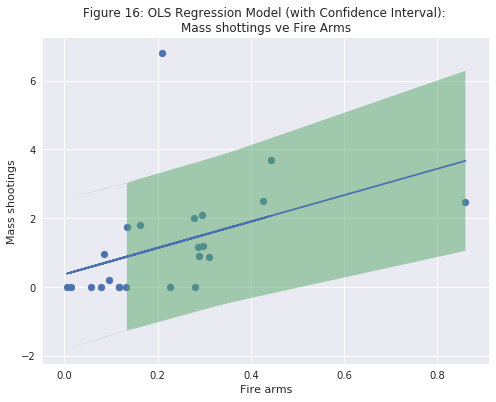

In [49]:
pl.figure(figsize=(8,6))
ci = df_['Mass_ci']
pl.scatter(x_o,y_o)
pl.plot(df_['Fire_pc'], Fit1.predict(df_),'-')
pl.fill_between(x_o, Fit1.predict(df_) - ci, Fit1.predict(df_) + ci, alpha=0.5)
pl.ylabel("Mass shootings")
pl.xlabel("Fire arms")
pl.title('Figure 16: OLS Regression Model (with Confidence Interval): \nMass shottings ve Fire Arms')
pl.show()

### Caption: 
The confidence intervals are very similar to each other but increase a little with the y value.

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1832: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


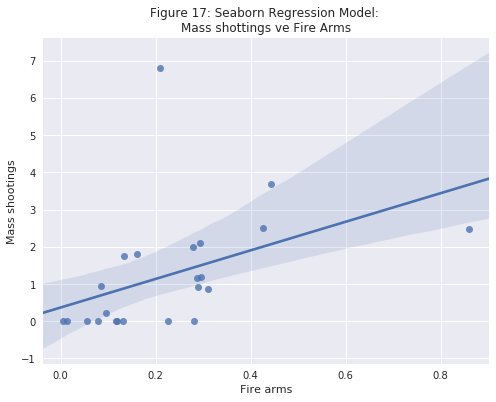

In [50]:
# Seaborn Regression model
pl.figure(figsize=(8,6))

sns.regplot(x="Fire_pc", y="Mass_pc", data=df_);

pl.ylabel("Mass shootings")
pl.xlabel("Fire arms")
pl.title('Figure 17: Seaborn Regression Model: \nMass shottings ve Fire Arms');

### Caption: 

The confidenc interval in the seahorn model grow with the distance the value have from the mean and it is not symmetrial around the fitted regression line. 

## Use the stsatsmodels.gaphics package to plot the influence plot. 
Read the package documentation to learn how to read this plot and extract the countries with the highest influence

This is the topic of this week's assigned reading, so make sure you do the reading before you do this step. It will help you interpret the plot.

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


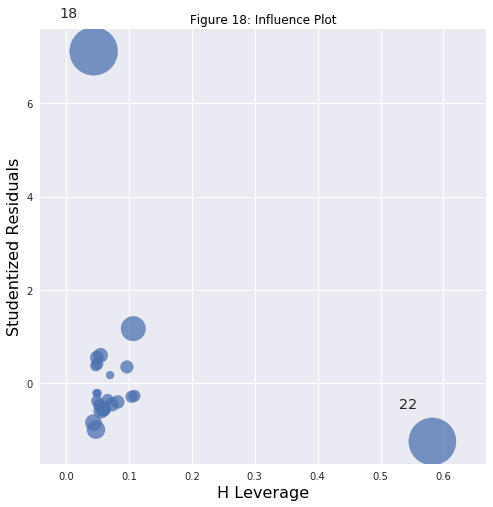

In [51]:
# Producing an Influence Plot
sm.graphics.influence_plot(Fit1, alpha  = 0.05, criterion="cooks")
pl.title('Figure 18: Influence Plot');

### Caption:
The dot size represents its Cook's D or Cook's distance. Cook's distance is quite often used to measure the robustness of the fit model. In this case, Cook's D measures the influence of each value on the overll fit and values greater than 4/n = 0.17 (dotted line; n = 23) can be considered as with high influence. The bigger the dots, the higher it's influence it has on the fitted model. 

With regards to the H Leverage, the bigger it is, that higher influnece it has, we have determined the critical value of 0.17. Therefore, dots on the right side of 0.15 can be deemed importantly influential. 

Residuals (student's t method used here) talks about the difference between value and the expected value (mean). The further it is from 0 on the y axis, the greater chance it can become an outlier. Generally, when the absolute studentized value can be over 2, it many time can be counted as an outlier (outside 95%).  

In summary, the three dots with marks 4, 8, 13 should be paid extra attention to with regards to their value, influence, and outlier consideration. 


## Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences

## Discuss your findings

## Reference: Altman, N., & Krzywinski, M. (2016). Points of Significance: Analyzing outliers: influential or nuisance?.